# Analysis2
- performed web scrape to fetch list of clubs and their location
- restructured the data to contain date,home team, away team,home goals,away goal
- intergrate club location to the restructured dataframe
- used pip install geopy to find coordinates for cities
- Now we have the date,time,location of the match. Lets hit the temperature API and fetch the temprature for every match
- After extracting weather data, now let us understand team performance based on weather condition

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline

In [52]:
import glob
import json
import datetime
import os
#import fnmatch
import csv
import pandas as pd
import numpy as np
import warnings
from geopy.geocoders import Nominatim
from io import StringIO
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.collections
import seaborn as sns
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [4]:
#Read clubLocation_List to idntify ID
directory='Data/Football/club_city_list/club_list.csv'
df=pd.read_csv(directory,sep=',')[['Club','Location']]
df.head()
df.loc[df['Club']=='A.F.C. Bournemouth',['Club']]='AFC Bournemouth'
df.loc[df['Club']=='Sunderland',['Club']]='Sunderland AFC'
df["Coordinates"] = np.nan

df.tail()

,Club,Location,Coordinates
41,Watford,Watford,NaN
42,West Bromwich Albion,West Bromwich,NaN
43,West Ham United,London,NaN
44,Wigan Athletic,Wigan,NaN
45,Wolverhampton Wanderers,Wolverhampton,NaN


In [5]:
#Find coordinates for cities 
geolocator = Nominatim()
df['Coordinates']=df['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df.to_csv('Data/Football/club_city_list/Premier_League_Locations.csv', sep=',', encoding='utf-8')

In [6]:
df.head()

,Club,Location,Coordinates
0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"
1,Arsenal,London,"(51.5073219, -0.1276473)"
2,Aston Villa,Birmingham,"(52.4776875, -1.8948515)"
3,Barnsley,Barnsley,"(53.5527719, -1.4827754)"
4,Birmingham City,Birmingham,"(52.4776875, -1.8948515)"


In [7]:
directory="Data/Football/Premier_League_2015_Data"
count=0
match_dic = {}
all_match_details_dataframe = pd.DataFrame(columns = ['Date_Time','home','away','home_goal','away_goal'])

for root, dirs, files in os.walk(directory):
     for file in files:
        with open(os.path.join(root, file), "r") as f:
            data = json.load(f)
            count+=1
            date_time = data['date']
            home_city=""
            away_city=""
            #if data['homeTeamName'][]
#print(date_time)
            #datetime.datetime.strptime(date_time,  '%Y-%m-%dT%H:%M:%S')
            #time
            all_match_details_dataframe.loc[count] = [date_time,data['homeTeamName'],data['awayTeamName'],data['result']['goalsHomeTeam'],data['result']['goalsAwayTeam']]
            

In [8]:
for x in all_match_details_dataframe['home']:
    if x[-2:]=='FC' and x[-3:]!='AFC':
        all_match_details_dataframe.loc[all_match_details_dataframe['home']==x,['home']]=x[0:-2]
for x in all_match_details_dataframe['away']:
    if x[-2:]=='FC'and x[-3:]!='AFC':
        all_match_details_dataframe.loc[all_match_details_dataframe['away']==x,['away']]=x[:-2]
        
all_match_details_dataframe.tail()


,Date_Time,home,away,home_goal,away_goal
376,2016-02-27T12:45:00Z,West Ham United,Sunderland AFC,1.0,0.0
377,2016-05-07T14:00:00Z,West Ham United,Swansea City,1.0,4.0
378,2016-03-02T19:45:00Z,West Ham United,Tottenham Hotspur,1.0,0.0
379,2016-04-20T18:45:00Z,West Ham United,Watford,3.0,1.0
380,2015-11-29T14:05:00Z,West Ham United,West Bromwich Albion,1.0,1.0


In [9]:
match_details=pd.merge(all_match_details_dataframe, df,left_on=all_match_details_dataframe['home'].str.strip(), right_on = 'Club',how='left')
match_details.head()

,Date_Time,home,away,home_goal,away_goal,Club,Location,Coordinates
0,2016-02-07T13:30:00Z,AFC Bournemouth,Arsenal,0.0,2.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"
1,2015-08-08T14:00:00Z,AFC Bournemouth,Aston Villa,0.0,1.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"
2,2016-04-23T14:00:00Z,AFC Bournemouth,Chelsea,1.0,4.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"
3,2015-12-26T15:00:00Z,AFC Bournemouth,Crystal Palace,0.0,0.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"
4,2015-11-28T15:00:00Z,AFC Bournemouth,Everton,3.0,3.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)"


In [10]:
match_details['Date'], match_details['Time'] = zip(*match_details['Date_Time'].map(lambda x: x.split('T')))
match_details.head()

,Date_Time,home,away,home_goal,away_goal,Club,Location,Coordinates,Date,Time
0,2016-02-07T13:30:00Z,AFC Bournemouth,Arsenal,0.0,2.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)",2016-02-07,13:30:00Z
1,2015-08-08T14:00:00Z,AFC Bournemouth,Aston Villa,0.0,1.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)",2015-08-08,14:00:00Z
2,2016-04-23T14:00:00Z,AFC Bournemouth,Chelsea,1.0,4.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)",2016-04-23,14:00:00Z
3,2015-12-26T15:00:00Z,AFC Bournemouth,Crystal Palace,0.0,0.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)",2015-12-26,15:00:00Z
4,2015-11-28T15:00:00Z,AFC Bournemouth,Everton,3.0,3.0,AFC Bournemouth,Bournemouth,"(50.74467035, -1.85798080318094)",2015-11-28,15:00:00Z


In [11]:
#match_details[['Coordinates_lat','Coordinates_long']] =pd.DataFrame(df['Coordinates'].tolist())# df['Coordinates'].apply(pd.Series)
#match_details.tail()

In [12]:
match_details[['Date_Time','home','away','home_goal','away_goal','Location','Coordinates','Date','Time']].sort_values(by=['Date_Time']).reset_index(drop=True).to_csv('Data/Football/all_match_details.csv', sep=',', encoding='utf-8')

In [13]:
#Based on date,coordinates and locatiion, weather data has been integrated 
path_weather= "Data/Weather/match_with_weather.csv"
match_weather_df = pd.read_csv(path_weather,sep=',')[['Date_Time','Date','Time','Location','home','away','home_goal','away_goal','weatherDesc','FeelsLikeF','humidity','visibility','windspeedMiles']]
#match_weather_df[['home_goal','away_goal']].astype(int)
match_weather_df.head()

,Date_Time,Date,Time,Location,home,away,home_goal,away_goal,weatherDesc,FeelsLikeF,humidity,visibility,windspeedMiles
0,2015-08-08T11:45:00Z,2015-08-08,11:45:00Z,Trafford,Manchester United,Tottenham Hotspur,1.0,0.0,Overcast,62,71,10,6
1,2015-08-08T14:00:00Z,2015-08-08,14:00:00Z,Bournemouth,AFC Bournemouth,Aston Villa,0.0,1.0,Sunny,67,61,10,5
2,2015-08-08T14:00:00Z,2015-08-08,14:00:00Z,Leicester,Leicester City,Sunderland AFC,4.0,2.0,Light rain shower,66,67,10,7
3,2015-08-08T14:00:00Z,2015-08-08,14:00:00Z,Norwich,Norwich City,Crystal Palace,1.0,3.0,Sunny,64,65,10,7
4,2015-08-08T14:00:00Z,2015-08-08,14:00:00Z,Liverpool,Everton,Watford,2.0,2.0,Overcast,64,69,10,4


In [14]:
#Identify unique weather conditions
match_weather_df['weatherDesc'].unique()
#weather_type
#match_weather_df[match_weather_df['weatherDesc']=="Moderate rain"]

array(['Overcast', 'Sunny', 'Light rain shower', 'Patchy rain possible',
       'Light rain', 'Cloudy', 'Moderate or heavy rain shower',
       'Partly cloudy', 'Patchy light rain with thunder',
       'Torrential rain shower', 'Moderate rain', 'Moderate rain at times',
       'Light drizzle', 'Moderate or heavy rain with thunder',
       'Patchy light snow', 'Light snow showers', 'Patchy light drizzle',
       'Heavy rain', 'Thundery outbreaks possible', 'Light sleet',
       'Light snow', 'Patchy heavy snow', 'Moderate or heavy snow showers',
       'Light sleet showers', 'Heavy snow'], dtype=object)

In [15]:
match_weather_df.loc[match_weather_df['weatherDesc']=="Patchy rain possible",['weatherDesc']]="Light rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Light rain",['weatherDesc']]="Light rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Patchy light rain with thunder",['weatherDesc']]="Light rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Moderate rain",['weatherDesc']]="Moderate rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Moderate rain at times",['weatherDesc']]="Moderate rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Moderate or heavy rain shower",['weatherDesc']]="Heavy rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Moderate or heavy rain with thunder",['weatherDesc']]="Heavy rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Torrential rain shower",['weatherDesc']]="Heavy rain shower"
match_weather_df.loc[match_weather_df['weatherDesc']=="Patchy light snow",['weatherDesc']]="Light snow showers"
match_weather_df.loc[match_weather_df['weatherDesc']=="Patchy heavy snow",['weatherDesc']]="Heavy snow showers"
match_weather_df.loc[match_weather_df['weatherDesc']=="Moderate or heavy snow showers",['weatherDesc']]="Heavy snow showers"
match_weather_df.loc[match_weather_df['weatherDesc']=="Heavy snow",['weatherDesc']]="Heavy snow showers"
match_weather_df.loc[match_weather_df['weatherDesc']=="Light sleet",['weatherDesc']]="Light sleet showers"
match_weather_df.loc[match_weather_df['weatherDesc']=="Patchy light drizzle",['weatherDesc']]="Light drizzle"
match_weather_df.loc[match_weather_df['weatherDesc']=="Partly cloudy",['weatherDesc']]="Cloudy"
match_weather_df.loc[match_weather_df['weatherDesc']=="Overcast",['weatherDesc']]="Cloudy"



#all_match_details_dataframe.loc[all_match_details_dataframe['away']==,['away']]=x[:-2]

In [25]:
match_weather_df[match_weather_df['weatherDesc']=='Thundery outbreaks possible']

,Date_Time,Date,Time,Location,home,away,home_goal,away_goal,weatherDesc,FeelsLikeF,humidity,visibility,windspeedMiles
201,2016-01-12T19:45:00Z,2016-01-12,19:45:00Z,Birmingham,Aston Villa,Crystal Palace,1.0,0.0,Thundery outbreaks possible,30,81,10,21


In [17]:
match_weather_df['home'].unique()
df_test=pd.DataFrame(columns=['Team','count_game','points','goals'])
df_test['Team']=match_weather_df['home'].unique()

#df_test.loc[df_test['Team']==match_weather_df['home'], ['points']]
#match_weather_df[match_weather_df['weatherDesc']=="Moderate rain shower"]


In [18]:
match_weather_df['weatherDesc'].unique()

array(['Cloudy', 'Sunny', 'Light rain shower', 'Heavy rain shower',
       'Moderate rain shower', 'Light drizzle', 'Light snow showers',
       'Heavy rain', 'Thundery outbreaks possible', 'Light sleet showers',
       'Light snow', 'Heavy snow showers'], dtype=object)

In [126]:
# Make a dropdown to select the Area, or "All"

#plt.subplots(figsize=(3,4))
weather = widgets.Dropdown(options=['All'] + list(match_weather_df['weatherDesc'].unique()),value='All',description='weather:',)

def plotit(weather):
       
        match_weather_df_copy = match_weather_df.copy()
        if weather != 'All':
            match_weather_df_copy = match_weather_df_copy[match_weather_df_copy['weatherDesc'] == str(weather)]
           
        if len(match_weather_df_copy) > 0:
            
            #######

#create new columns for winning team,losing team home draw team and away draw team names
            match_weather_df_copy.loc[match_weather_df_copy['away_goal']>match_weather_df_copy['home_goal'] ,'winner'] = match_weather_df_copy['away']
            match_weather_df_copy.loc[match_weather_df_copy['away_goal']<match_weather_df_copy['home_goal'] ,'winner'] = match_weather_df_copy['home']
            match_weather_df_copy.loc[match_weather_df_copy['away_goal']>match_weather_df_copy['home_goal'] ,'loser'] = match_weather_df_copy['home']
            match_weather_df_copy.loc[match_weather_df_copy['home_goal']>match_weather_df_copy['away_goal'] ,'loser'] = match_weather_df_copy['away']
            match_weather_df_copy.loc[match_weather_df_copy['away_goal']==match_weather_df_copy['home_goal'] ,'home_draw'] = match_weather_df_copy['home']
            match_weather_df_copy.loc[match_weather_df_copy['away_goal']==match_weather_df_copy['home_goal'] ,'away_draw'] = match_weather_df_copy['away']

#create individual df for winning team,losing team home draw team and away draw team and their game count
            df_winner=match_weather_df_copy.groupby('winner')['winner'].count().to_frame().rename(columns = {'winner':'winner_count'}).reset_index()
            df_lose=match_weather_df_copy.groupby('loser')['loser'].count().to_frame().rename(columns = {'loser':'loser_count'}).reset_index()
            df_home_draw=match_weather_df_copy.groupby('home_draw')['home_draw'].count().to_frame().rename(columns = {'home_draw':'home_draw_count'}).reset_index()
            df_away_draw=match_weather_df_copy.groupby('away_draw')['away_draw'].count().to_frame().rename(columns = {'away_draw':'away_draw_count'}).reset_index()
            df_home_goals=match_weather_df_copy.groupby('home')['home_goal'].sum().to_frame().reset_index()
            df_away_goals=match_weather_df_copy.groupby('away')['away_goal'].sum().to_frame().reset_index()

# create team dataframe containing all 20 team names and merge it with the above datagrames to form one complete dataframe containg 
# game count in all the categories


            df_team= pd.DataFrame(columns=['Team'])
            team_list=match_weather_df_copy['home'].append(match_weather_df_copy['away']).unique()
            #list(set(match_weather_df_copy['home']+match_weather_df_copy['away']))
            #pd.DataFrame(match_weather_df_copy['home']+match_weather_df_copy['away'],columns='TeamName')
        
    
            df_team['Team']= team_list
            #team_list['TeamName'].unique()
            df_team=pd.merge(df_team,df_winner, left_on='Team', right_on ='winner',how = 'left')
            df_team=pd.merge(df_team,df_lose, left_on='Team', right_on ='loser',how = 'left')
            df_team=pd.merge(df_team,df_home_draw, left_on='Team', right_on ='home_draw',how = 'left')
            df_team=pd.merge(df_team,df_away_draw, left_on='Team', right_on ='away_draw',how = 'left')
            df_team=pd.merge(df_team,df_home_goals, left_on='Team', right_on ='home',how = 'left')
            df_team=pd.merge(df_team,df_away_goals, left_on='Team', right_on ='away',how = 'left')
            df_team[['winner_count','loser_count','home_draw_count','away_draw_count']].fillna(0,inplace=True)
            #print("df_team")
            #print(df_team)
            #Declaration
            #df_team['draw_count'] = 0
            #df_team['goal_count'] = 0

            df_team['draw_count']=df_team['home_draw_count']+df_team['away_draw_count']
            df_team['goal_count']=df_team['home_goal']+df_team['away_goal']

            #df_team.head()
            df_team_match_details=df_team[['Team','winner_count','loser_count','draw_count','goal_count']]

            df_team_match_details['winner_count'].fillna(0, inplace=True)
            df_team_match_details['loser_count'].fillna(0, inplace=True)
            df_team_match_details['draw_count'].fillna(0, inplace=True)
            df_team_match_details['goal_count'].fillna(0, inplace=True)
            df_team_match_details['match_count']= df_team_match_details['winner_count']+df_team_match_details['loser_count']+df_team_match_details['draw_count']
            df_team_match_details['match_count'].fillna(0, inplace=True)
            df_team_match_details['points']=(df_team_match_details['winner_count']*3)+(df_team_match_details['draw_count']*1)+(df_team_match_details['loser_count']*0)


            ########
            df_team_match_details['points'].fillna(0, inplace=True)
            #print("Final details: ", df_team_match_details)
            df_team_match_details1= df_team_match_details.sort_values(by=['points','goal_count'],ascending = False).reset_index(drop=True)
            ax = sns.barplot(y="Team", x="points", data=df_team_match_details1,color="#3498db")
            ax = sns.stripplot(y="Team", x="match_count", data=df_team_match_details1,
                     color=".3")
            ax.set(xlabel='Points Scored', ylabel='Team Name')
            #ax.set(xlabel='number of Matches', ylabel='Team Name')
            
            matchcountLegend = plt.Circle((1,1),0.2,color="black") 
            ax.set_xlim(xmin=0)
            plt.legend([matchcountLegend], ['Match Count'], loc=1, ncol = 2, prop={'size':10})
            plt.show()
            #tooltip= mpld3.plugins.PointLabelTooltip(ax,df_team_match_details1['points'])
            #mpld3.plugins.connect(ax,tooltip)
        
        else:
            print("No data to show for current selection")
        

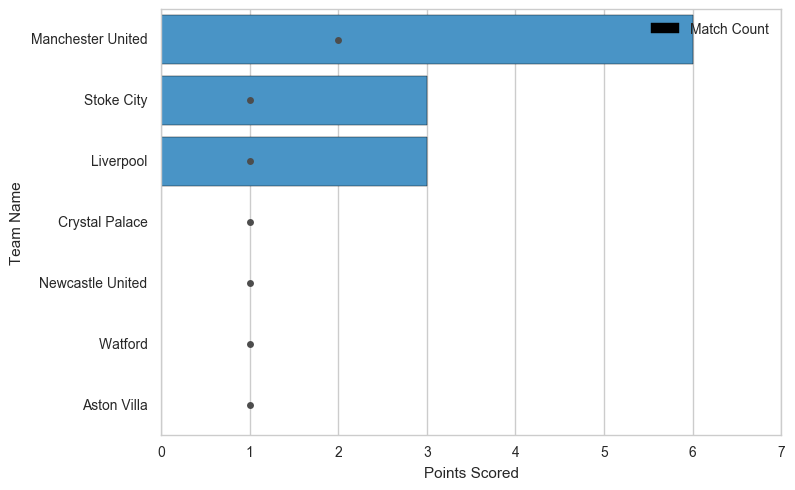

In [127]:
interactive(plotit, weather=weather,ax = plt.subplots(figsize=(15, 8)))